<font color='purple'>__Here we are trying to make sure how to really split categorical data with logistic regression the way it is explained in the link below. Note that there are some data splitting techniques along the way to learn.__<font> <br/>
    https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/ Also, trying to compare against this predictor: <br/>
    https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing as pp
import matplotlib.pyplot as plt
import seaborn as sbn


<font color='purple'>__Download the two datasets. First for simple regression, and the second for dividing up your classes__<font>

In [14]:
path= "Datasets/"
#path1 = "Datasets/Income_Class/"
SuvData= pd.read_csv(path + 'suv_data.csv')
#IncData=pd.read_csv(path1 + 'income_evaluation.csv' )
#SuvData.info()
#IncData.info()


#Looking at the data, what we need to do is replace the "object" columns with integer based; same process for IncData
i=0
gend = SuvData['Gender']
for c in SuvData.columns:
    if SuvData[c].dtypes == 'object':
        #Be sure to cover Nulls (even though we know we don't have any here)
        SuvData[c].fillna("not provided", inplace=True)
        SuvData[c]=SuvData[c].astype('str')
        LE=pp.LabelEncoder()
        values = pd.array(SuvData[c])
        encoded = LE.fit_transform(values)
        encoded=pd.Series(encoded)
        SuvData.insert(i,c+'_int',encoded)
        del SuvData[c]
        i = i+1
    else:
        i = i+1

gend_num= SuvData['Gender_int']
SuvData.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


<font color='purple'>__Note the use of the numpy "logical_and" as you can learn more below__<font> <br/>
    https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html <br/>
    There is also the conditions and the values that are typically good if you are going to create a new conditional column for your dataframe as we did here with the Gender_purchase_evenIsPurchased. *Note we named this with the evenIsPurchased because we needed to Note the even numbers meaning successful sale. Lastly note that we had the Gender_int which was a 1 for males and 0 for females.*

In [4]:
conditions=[np.logical_and(SuvData['Gender_int'] == 1, SuvData['Purchased'] == 1),
            np.logical_and(SuvData['Gender_int'] == 1, SuvData['Purchased'] == 0),
            np.logical_and(SuvData['Gender_int'] == 0, SuvData['Purchased'] == 1),
            np.logical_and(SuvData['Gender_int'] == 0, SuvData['Purchased'] == 0)
           ]
values = [0,1,2,3]
SuvData['Gender_purchase_evenIsPurchased']= np.select(conditions, values)
SuvData.head(10)

,User ID,Gender_int,Age,EstimatedSalary,Purchased,Gender_purchase_evenIsPurchased
0,15624510,1,19,19000,0,1
1,15810944,1,35,20000,0,1
2,15668575,0,26,43000,0,3
3,15603246,0,27,57000,0,3
4,15804002,1,19,76000,0,1
5,15728773,1,27,58000,0,1
6,15598044,0,27,84000,0,3
7,15694829,0,32,150000,1,2
8,15600575,1,25,33000,0,1
9,15727311,0,35,65000,0,3


<font color='purple'>__First let's work with the first dataset and copy what was done in the link here:<font> <br/>
    https://medium.com/analytics-vidhya/suv-purchase-prediction-using-logistic-regression-ca79bae6f3d5

C:\Users\djloq\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acuracy: 91.25%


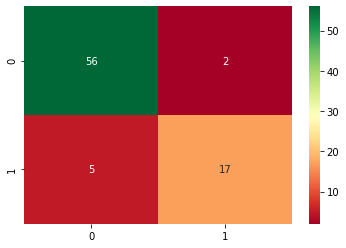

In [5]:
#Note this will show you don't have null values: SuvData.isnull().sum()
#Now, we are going to try seeing if we include more columns what might happen; note the use of iloc and []
#the inside [] seem to be imparative in setting up the new lists.
X= SuvData.iloc[:,[1,2,3]].values
Y= SuvData.iloc[:,[4]].values
Z= SuvData.iloc[:,[5]].values

# apparently as seen here, we need to ensure the x_shape, and y_shape have the same values
# https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam
#If you see X.shape, and Y,shape not showing some line up of dimenssions, you might have to use numpy.reshape()

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size = 0.20, random_state=0)
#The following preprocessing is added to the algorythm in order to divide out the standard deviation from each point.
#This is done because we have too much variance in the salary so that it ranges from 0 to 1.
prep_scaled = pp.StandardScaler()
X_train=prep_scaled.fit_transform(X_train)
X_test=prep_scaled.transform(X_test)

#Now the logistic regression implementation
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, Y_train)

#Test this out and show the accuracy score
Y_predict=LogReg.predict(X_test)
#Y_predict


#Y_test

accuracy = metrics.accuracy_score(Y_test,Y_predict)*100
print("Acuracy: " + str(accuracy)+ "%")
Y_mat=metrics.confusion_matrix(Y_test,Y_predict)
sbn.heatmap(Y_mat,annot=True, cmap='RdYlGn')

<font color='purple'>__Now let's try to run the same functions on the Z variable__<font>

Acuracy: 91.25


C:\Users\djloq\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


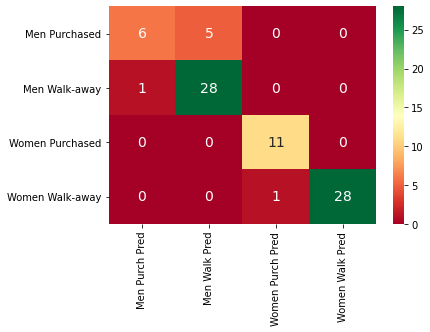

In [8]:
X_train, X_test, Z_train, Z_test =train_test_split(X,Z,test_size = 0.20, random_state=0)

prep_scaled_Z = pp.StandardScaler()
X_train=prep_scaled_Z.fit_transform(X_train)
X_test=prep_scaled_Z.transform(X_test)

LogReg_Z = LogisticRegression(random_state=0)
LogReg_Z.fit(X_train, Z_train)

Z_predict=LogReg_Z.predict(X_test)

accuracy = metrics.accuracy_score(Z_test,Z_predict)*100
print("Acuracy: " + str(accuracy))

#Now let's plot this one and convert the confusion to a dataframe for readability:
Z_mat=metrics.confusion_matrix(Z_test,Z_predict)
Z_dfmat=pd.DataFrame(Z_mat)
Z_dfmat.columns = ['Men Purch Pred', 'Men Walk Pred', 'Women Purch Pred', 'Women Walk Pred']
Z_dfmat.index = ['Men Purchased', 'Men Walk-away', 'Women Purchased', 'Women Walk-away']
#Right now, we are trying to show the percentage of each category that was accurately predicted. 
#However, 
Mat_sum=Z_mat.sum()
Mat_sum
#Z_dfmat = Z_dfmat.astype('float')/Mat_sum
sbn.heatmap(Z_dfmat,annot=True, cmap='RdYlGn',annot_kws={'size':14})


<font color='purple'>__Now let's try to break the confusion matricies down into the sub categorical pairs__<font> <br/>
    You can somewhat see the process here: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/  
    further, there is a guide to setting this up: https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python

array([[[68,  1],
        [ 5,  6]],

       [[46,  5],
        [ 1, 28]],

       [[68,  1],
        [ 0, 11]],

       [[51,  0],
        [ 1, 28]]], dtype=int64)

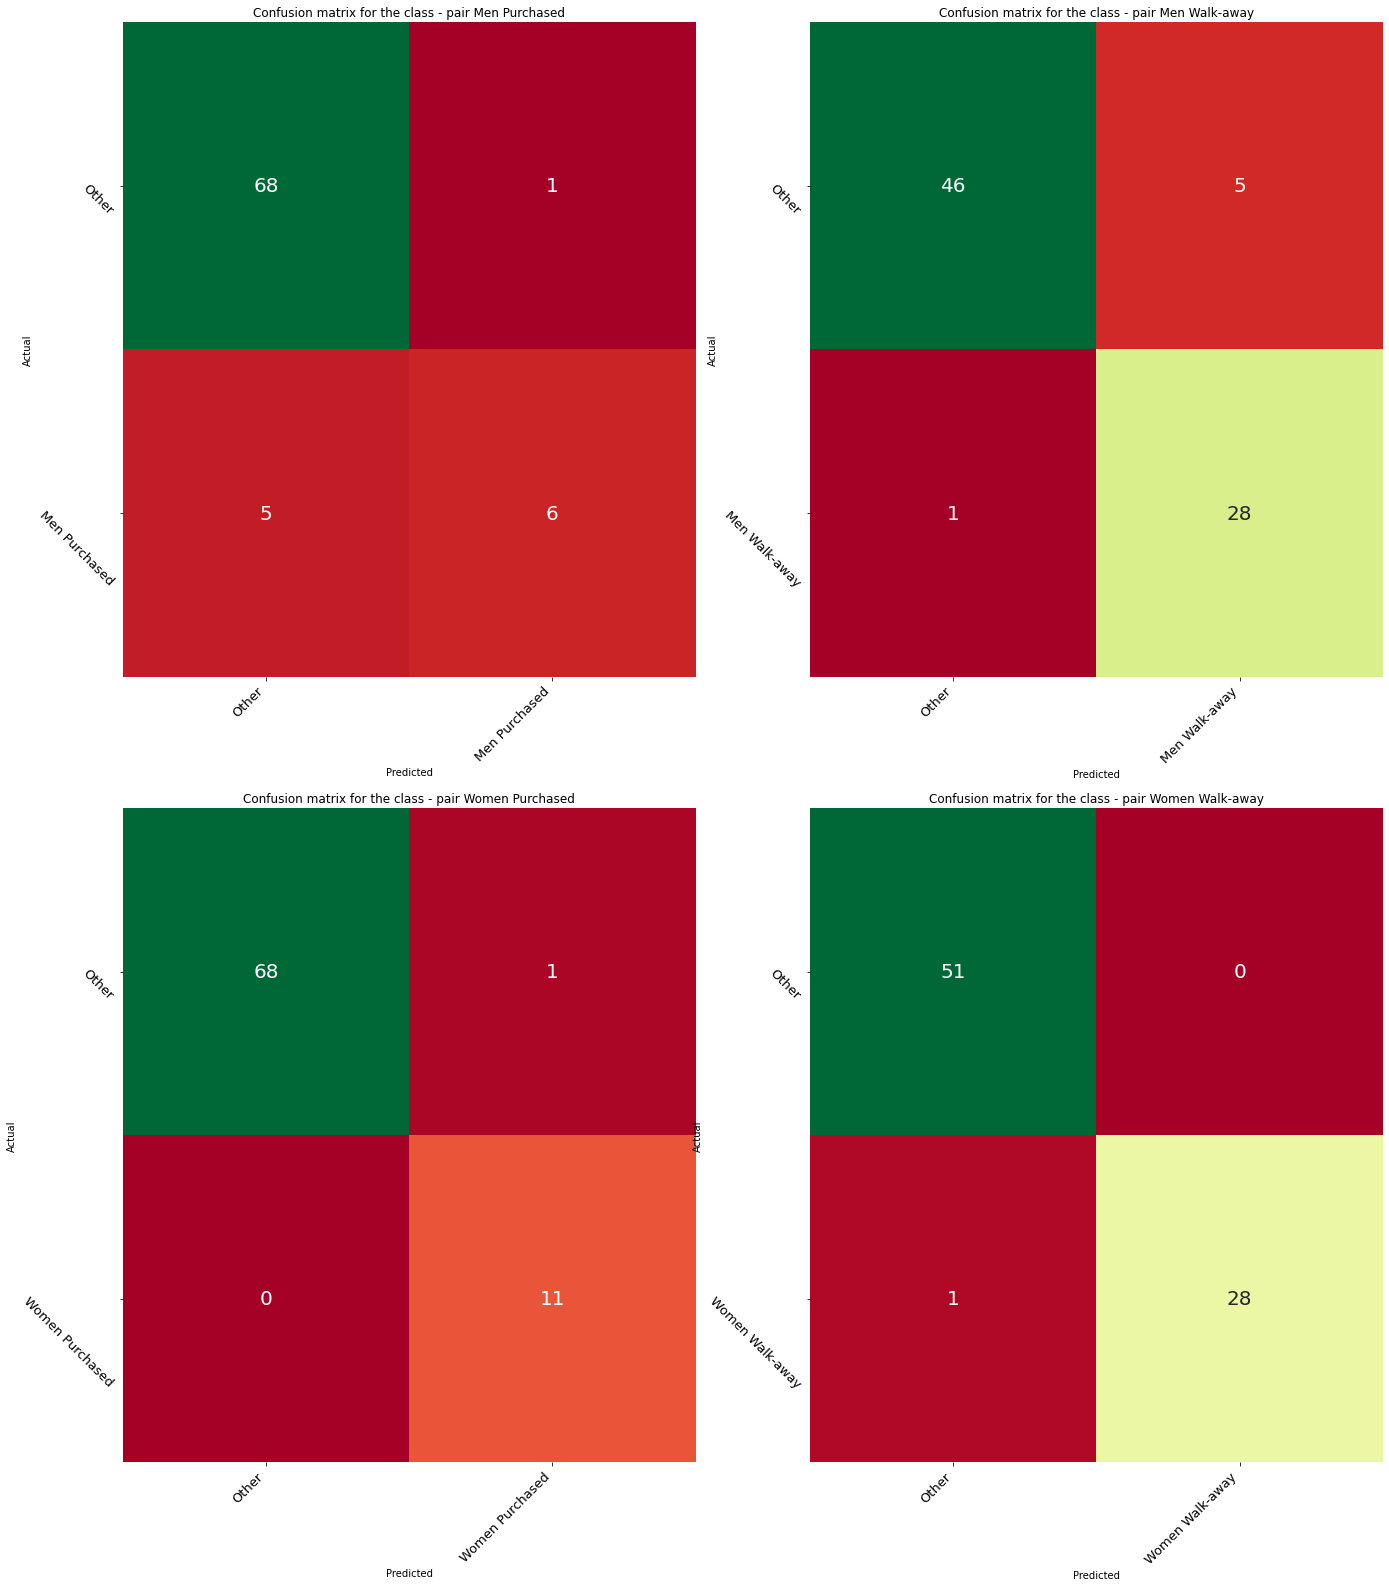

In [12]:
Mult_mat = metrics.multilabel_confusion_matrix(Z_test,Z_predict, labels=[0,1,2,3])
#now you want to create a label set based on the set. Note that join here seems to be a concatenation.
labels = ["".join("pair " + Z_dfmat.index[i]) for i in range(0,4)]

#Note this process could help you plot out the errors you will see in many confusion matricies
def print_confusion_matrix(conf_mat, axes, class_label, class_names, fontsize = 13):
    df_cm = pd.DataFrame(conf_mat, index=class_names, columns = class_names)
    heatmap = sbn.heatmap(df_cm, annot = True, cmap='RdYlGn', cbar =False, annot_kws={'size':20}, ax=axes)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=-45,  ha='right',fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,  ha='right',fontsize = fontsize)
    axes.set_ylabel("Actual")
    axes.set_xlabel("Predicted")
    axes.set_title("Confusion matrix for the class - " + class_label)
    
#Now see the defined setting of axis, titles, heatmaps, and ticklabels in the right order. Note the zip() sort of groups a 
#series of values that might be in separate arrays and bunches them one by one. Flatten() just breaks n-dimensions into one
#flat dimension vector
fig, ax = plt.subplots(2,2,figsize = (10,8))
    
#Now, you need to just look closer at the labels and see if we can't come up with something better than "Y" & "N"
for axes, cfs_matrix, label,field in zip(ax.flatten(), Mult_mat, labels, Z_dfmat.index):
    print_confusion_matrix(cfs_matrix,axes,label,["Other",field])
    
    plt.subplots_adjust(top=2.75,bottom=0.25,right = 2.25, left = 0.5)
    #plt.show()
Mult_mat
